In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import SPerceptron
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import RidgeClassifier

In [2]:
encoder = LabelEncoder()
df = pd.read_csv("xAPI-Edu-Data.csv")
print(df.shape)
df.head()

(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df['Class'].replace({'L': 0, 'M': 1 , 'H':2}, inplace=True)
df['StageID'] = encoder.fit_transform(df['StageID'])
df['NationalITy'] = encoder.fit_transform(df['NationalITy'])
df['GradeID'] = encoder.fit_transform(df['GradeID'])
df['SectionID'] = encoder.fit_transform(df['SectionID'])
df['Topic'] = encoder.fit_transform(df['Topic'])
df['Semester'].replace({'S': 0, 'F': 1}, inplace=True)
df['Relation'].replace({'Father': 0, 'Mum': 1}, inplace=True)
df['ParentAnsweringSurvey'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['ParentschoolSatisfaction'].replace({'Bad': 0, 'Good': 1}, inplace=True)
df['StudentAbsenceDays'].replace({'Above-7': 0, 'Under-7': 1}, inplace=True)
df['StageID'].replace({'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool':2 },inplace = True)

In [4]:
#Training
X = df[['StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
        'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays']]
y = df.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=91)

In [24]:

clf = RandomForestClassifier(criterion='entropy',random_state=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy:",score*100,'%')
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))



Accuracy: 84.375 %
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.82      0.79      0.81        39
           2       0.81      0.91      0.86        23

    accuracy                           0.84        96
   macro avg       0.84      0.85      0.85        96
weighted avg       0.85      0.84      0.84        96



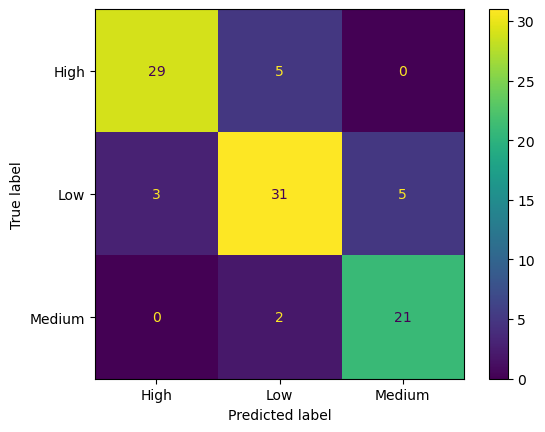

In [26]:

CM = confusion_matrix(y_test, y_pred)
Result = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=['High','Low','Medium'] )
Result.plot()